# 6.2: Exploring Relationships

### This script contains the following:

#### 1. Importing Libraries 
#### 2. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
#### 3. Exporting

## 1. Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\Brichaelle\Flavors of Cocoa\Data\original data\flavors_of_cacao.csv', index_col = False) 

In [4]:
path = r'C:\Users\Brichaelle\Flavors of Cocoa'

In [5]:
df = pd.read_csv(os.path.join(path, 'Data', 'prepared data', 'cleaned_sets.csv'), index_col = False)

## 2. Exploring Relationships

### Correlation(Seaborn):

In [6]:
df.columns

Index(['Unnamed: 0', 'Company (Maker-if known)',
       'Specific Bean Origin or Bar Name', 'REF', 'Review Date',
       'Cocoa Percent', 'Company Location', 'Rating', 'Bean Type',
       'Broad Bean Origin'],
      dtype='object')

In [19]:
del df['Unnamed: 0']

In [7]:
# Create a subset excluding the "Review Date" and "REF" columns

sub = df[['Company (Maker-if known)', 'Specific Bean Origin or Bar Name', 'Cocoa Percent', 'Company Location', 'Rating', 'Bean Type', 'Broad Bean Origin']]

In [8]:
sub

,Company (Maker-if known),Specific Bean Origin or Bar Name,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,63,France,3.75,,Sao Tome
1,A. Morin,Kpime,70,France,2.75,,Togo
2,A. Morin,Atsane,70,France,3.00,,Togo
3,A. Morin,Akata,70,France,3.50,,Togo
4,A. Morin,Quilla,70,France,3.50,,Peru
...,...,...,...,...,...,...,...
1790,Zotter,Peru,70,Austria,3.75,,Peru
1791,Zotter,Congo,65,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,65,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,62,Austria,3.25,,India


C:\Users\Brichaelle\AppData\Local\Temp\ipykernel_10968\4029816704.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to


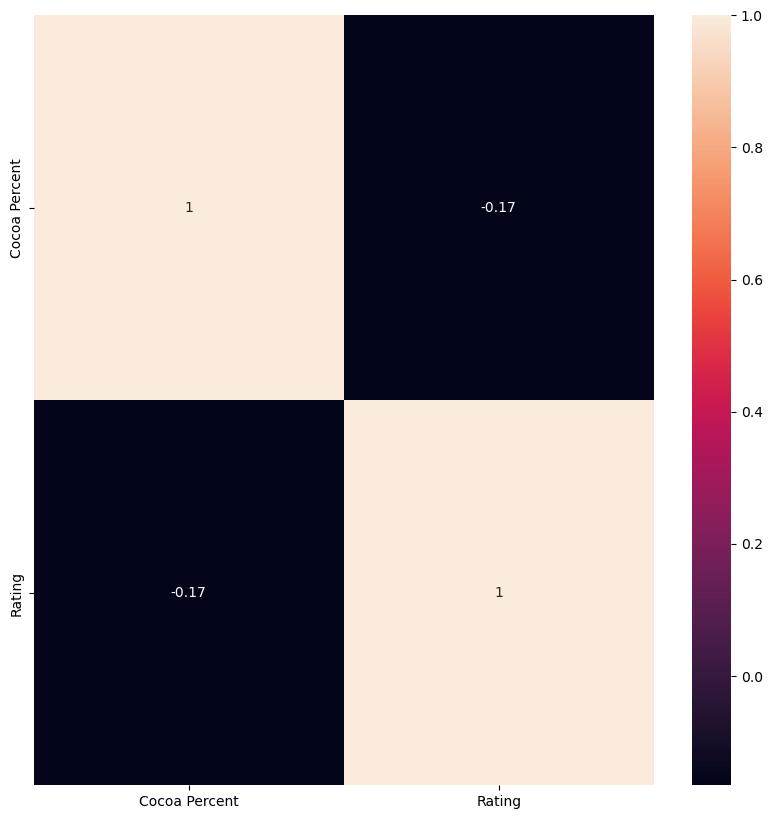

In [9]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### The Correlation above shows that cocoa percent and rating have a negative relationship to each other where the percentage in chocolate does not determine the rating it will receive

### Scatterplot

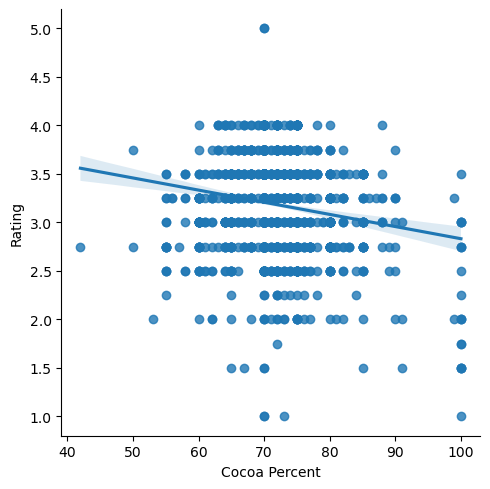

In [10]:
# Create a scatterplot for the "rating" and "cocoa percent" columns in seaborn

sns.lmplot(x = 'Cocoa Percent', y = 'Rating', data = sub)

#### There is a weak negative relationship between the variables. The trend line isnt very steep and the lot points sit ontop each other because chocolates having a rating of 3 could have any percent of chocolate

### Pair Plots

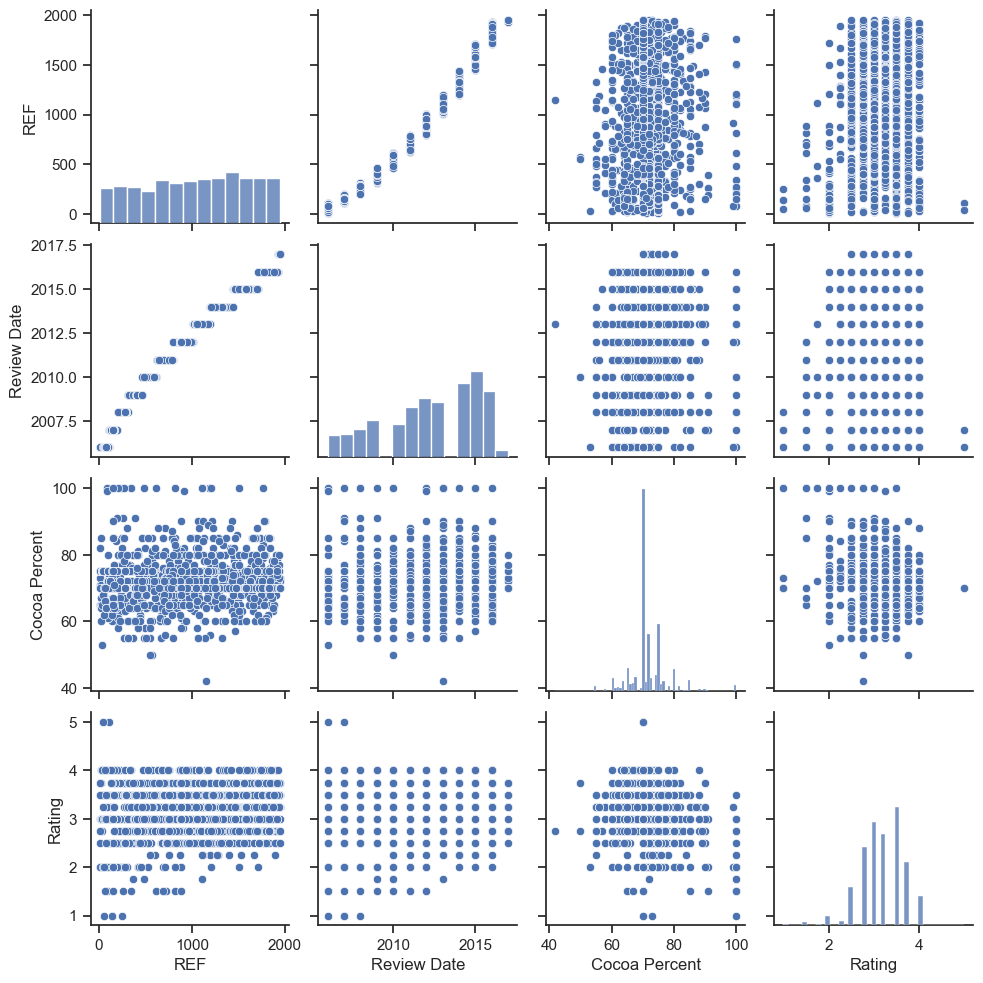

In [20]:
# Create a pair plot 

g = sns.pairplot(df)

#### This data set only contains two useful numerical values that will assist in garnering insights, Rating and Cocoa Percent. The charts shown are essentially the same as the scatterplot preceeding it. Pair plots may not be a useful tool in this instance

### Categorical Plot

<Axes: xlabel='Rating', ylabel='Count'>

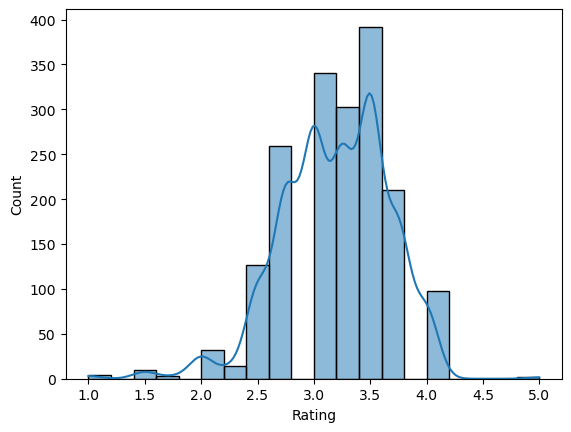

In [12]:
# Use a histogram to visualize the distribution of the variables 
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['Rating'], bins = 20, kde = True)

In [13]:
df.loc[df['Rating'] <= 2.5, 'Rate category'] = 'Low rating'

In [14]:
df.loc[(df['Rating'] >= 2.75) & (df['Rating'] <= 3.5), 'Rate category'] = 'Middle rating'

In [15]:
df.loc[df['Rating'] >= 3.75, 'Rate category'] = 'High rating'

In [16]:
df['Rate category'].value_counts(dropna = False)

Middle rating    1295
High rating       310
Low rating        190
Name: Rate category, dtype: int64

In [17]:
df.columns

Index(['Unnamed: 0', 'Company (Maker-if known)',
       'Specific Bean Origin or Bar Name', 'REF', 'Review Date',
       'Cocoa Percent', 'Company Location', 'Rating', 'Bean Type',
       'Broad Bean Origin', 'Rate category'],
      dtype='object')

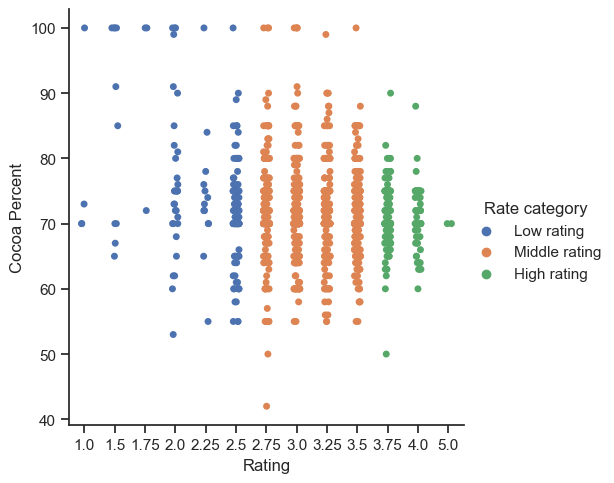

In [18]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Rating", y="Cocoa Percent", hue="Rate category", data=df)

#### Ratings are distributed equally across the board. With previous findings, a percent of 100 could fall within any of the 3 categories made

### Questions

#### How does the ranking of Cocoa Percent relate to overall rating?

Cocoa Percent does not have a direct impact on the overall rating of chocolates. Provided with the graphs shown, they're both independant of each other

## 3. Exporting

In [21]:
df.to_csv(os.path.join(path, 'Data','Visualizations', 'charts.csv'))